<a href="https://colab.research.google.com/github/pronsSec/IDOR-for-the-casual/blob/main/Russian_to_English_Translator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  ---
_   _   _   _   _   _   _     _   _     _   _   _   _   _   _   _     _   _   
 ( A | u | d | i | o ) ( T | r | a | n | s | l | a | t | o | r ) ( f | o | r )
 
( C | o | n | t | e | n | t ) ( C | r | e | a | t | o | r | s )
 

---


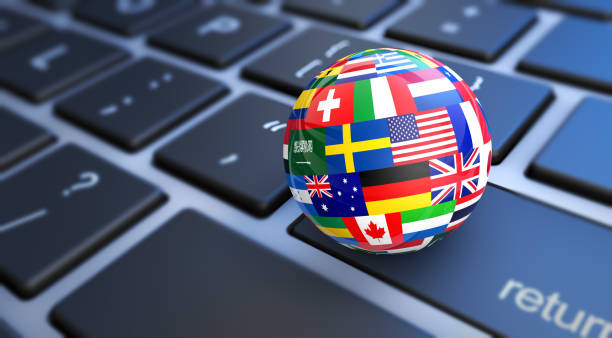




# Additional language support to be added ASAP

#You will receive text output in both the input and output languages

#You will also receive audio files in the output language. 



## download this safe audio sample in Russian language here if needed...local upload of .wav only at this point (changing soon to live input + others) 

#https://nemo-public.s3.us-east-2.amazonaws.com/mcv-samples-ru/common_voice_ru_19034087.wav

In [ ]:
#@title Press play and follow the prompts. It will take some time to initiate everything as it is being processed fresh each time. 
BRANCH = 'v1.0.0'
!python -m pip install git+https://github.com/NVIDIA/NeMo.git@$BRANCH#egg=nemo_toolkit[all]

# Import NeMo and it's ASR, NLP and TTS collections
import nemo
# Import Speech Recognition collection
import nemo.collections.asr as nemo_asr
# Import Natural Language Processing colleciton
import nemo.collections.nlp as nemo_nlp
# Import Speech Synthesis collection
import nemo.collections.tts as nemo_tts
# We'll use this to listen to audio
import IPython

# Speech Recognition model - QuartzNet trained on Russian part of MCV 6.0
quartznet = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="stt_ru_quartznet15x5").cuda()
# Neural Machine Translation model
nmt_model = nemo_nlp.models.MTEncDecModel.from_pretrained(model_name='nmt_ru_en_transformer6x6').cuda()
# Spectrogram generator which takes text as an input and produces spectrogram
spectrogram_generator = nemo_tts.models.Tacotron2Model.from_pretrained(model_name="tts_en_tacotron2").cuda()
# Vocoder model which takes spectrogram and produces actual audio
vocoder = nemo_tts.models.WaveGlowModel.from_pretrained(model_name="tts_waveglow_88m").cuda()



In [ ]:
#@title This will ask for your local file input of a .wav file...IMPORTANT: The audio must be mono with 16Khz sampling rate  { display-mode: "form" }


from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
IPython.display.Audio(fn)




In [ ]:
#@title Just Press Play. This changes the input language audio to audio output in the output language. { display-mode: "form" }

russian_text = quartznet.transcribe([fn])
english_text = nmt_model.translate(russian_text)



# A helper function which combines Tacotron2 and WaveGlow to go directly from 
# text to audio
def text_to_audio(text):
  parsed = spectrogram_generator.parse(text)
  spectrogram = spectrogram_generator.generate_spectrogram(tokens=parsed)
  audio = vocoder.convert_spectrogram_to_audio(spec=spectrogram)
  return audio.to('cpu').numpy()




In [ ]:
#@title Press here to see your text outputs as well as your audio output. { display-mode: "form" }
print('--------------------------------------------')
print('--------------------------------------------')
print('TEXT OUTPUT: ')
print('--------------------------------------------')
print('Input Language: ' + str(russian_text))

print('English form: ' + str(english_text))

# Listen to generated audio in English
print('--------------------------------------------')
print('--------------------------------------------')
print('Press to hear your output: ')
IPython.display.Audio(text_to_audio(english_text[0]), rate=22050)